## IPL First Inning Score Prediction

#### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
def read_dataset_manually(file_path):
    import csv
    dataset= []
    with open (file_path, 'r') as file:
        csv_reader = csv.reader(file)
        for x in csv_reader:
            dataset.append(x)
    df = pd.DataFrame(dataset,columns= dataset[0])
    df.drop(df.index[0], inplace=True)
    return df

In [3]:
dataset =read_dataset_manually('ipl.csv')
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df_ipl = pd.read_csv('ipl.csv')
df_ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
df_ipl.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [7]:
columns_to_remove = ['mid','batsman','bowler','striker','non-striker']

In [8]:
df_ipl.drop(labels=columns_to_remove, axis=1,inplace=True)
df_ipl.tail()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
76009,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,129
76010,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,129
76011,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,129
76012,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,129
76013,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,8,19.6,47,1,129


In [9]:
df_ipl.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians',
                   'Kings XI Punjab','Royal Challengers Bangalore','Delhi Daredevils','Sunrisers Hyderabad']

In [11]:
df_ipl= df_ipl[df_ipl.bat_team.isin(consistent_team) & df_ipl.bowl_team.isin(consistent_team)]
df_ipl.tail()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107
75888,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107


In [12]:
df_ipl.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [13]:
df_ipl = df_ipl[df_ipl['overs'] >= 5]
df_ipl.overs.unique()

array([ 5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,
        8.5,  8.6,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3,
       10.4, 10.5, 10.6, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2,
       12.3, 12.4, 12.5, 12.6, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6,
       16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 17.1, 17.2, 17.3, 17.4, 17.5,
       17.6, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 19.1, 19.2, 19.3, 19.4,
       19.5, 19.6, 12. ,  7. , 19. , 15. , 18. , 11. , 14. ,  6. ,  5. ,
        9. , 13. , 16. ,  8. , 17. , 10. ])

In [14]:
from datetime import datetime
df_ipl['date'] = df_ipl['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
df_ipl.date.dtype

dtype('<M8[ns]')

In [15]:
df_ipl.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [16]:
encoded_df = pd.get_dummies(data=df_ipl,columns=['bat_team','bowl_team'],drop_first=True)
encoded_df.tail()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
75884,2017-05-19,M Chinnaswamy Stadium,106,9,18.1,29,4,107,0,0,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,M Chinnaswamy Stadium,107,9,18.2,29,4,107,0,0,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,M Chinnaswamy Stadium,107,9,18.3,28,4,107,0,0,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,M Chinnaswamy Stadium,107,9,18.4,24,4,107,0,0,...,0,0,0,0,0,0,1,0,0,0
75888,2017-05-19,M Chinnaswamy Stadium,107,10,18.5,23,5,107,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
encoded_df.columns

Index(['date', 'venue', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
encoded_df.venue = labelEncoder.fit_transform(encoded_df.venue)
encoded_df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,13,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,13,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,13,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,13,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,13,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
x_train = encoded_df.drop(columns=['total'],axis=1)[encoded_df.date.dt.year <= 2016]
x_test = encoded_df.drop(columns=['total'], axis=1)[encoded_df.date.dt.year >= 2017]
y_train = encoded_df[encoded_df.date.dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df.date.dt.year >=2017]['total'].values

In [20]:
import datetime as dt
x_train['date']= x_train['date'].map(dt.datetime.toordinal)
x_test['date'] = x_test['date'].map(dt.datetime.toordinal)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(x_test)

<AxesSubplot:>

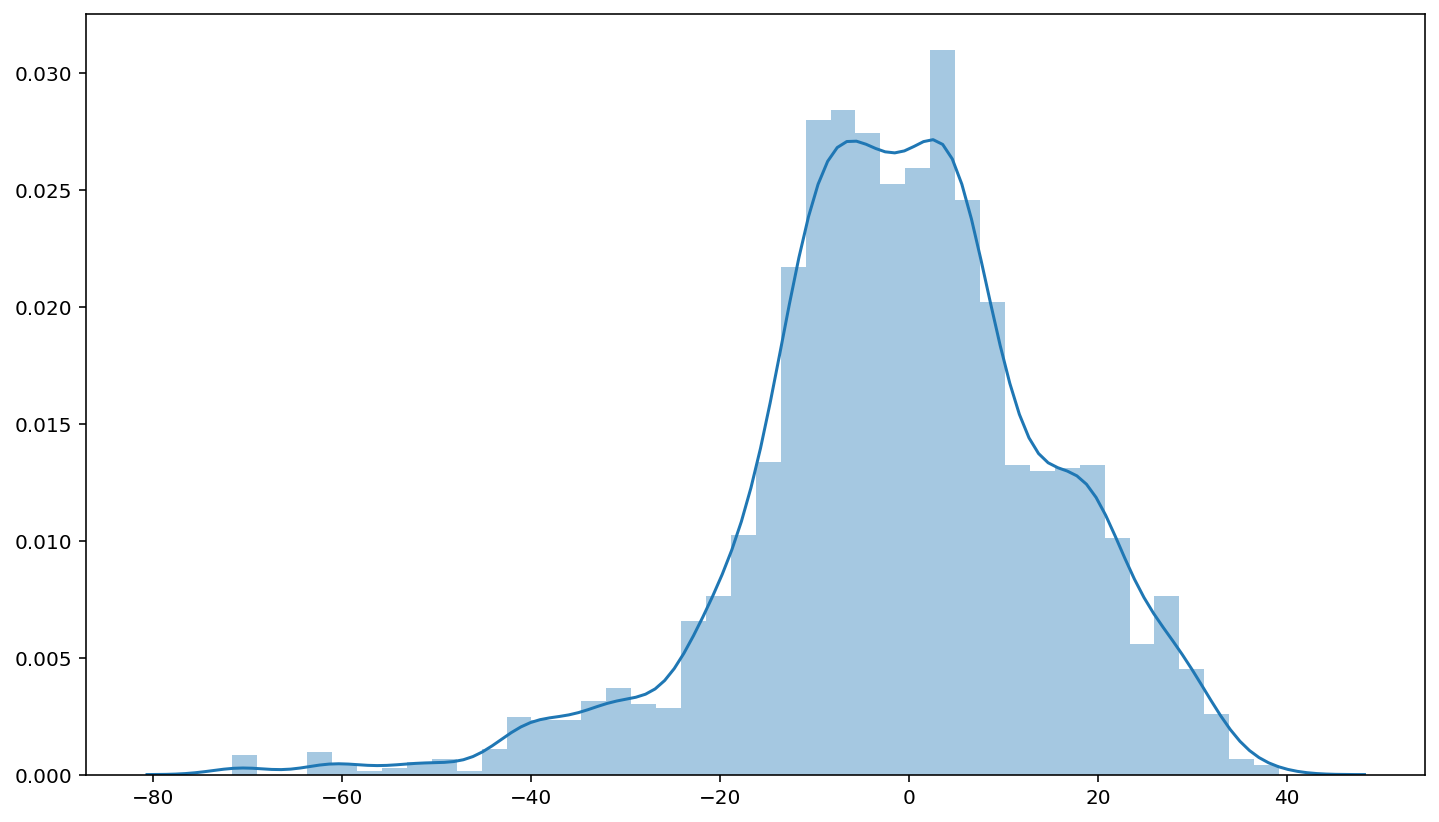

In [23]:
sns.distplot(y_test-y_pred)

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [25]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8, 1e-4, 1e-2, 1.5,10,20,30,35,40]}

In [26]:
ridge_regressor = GridSearchCV(ridge,parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 1.5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

<AxesSubplot:>

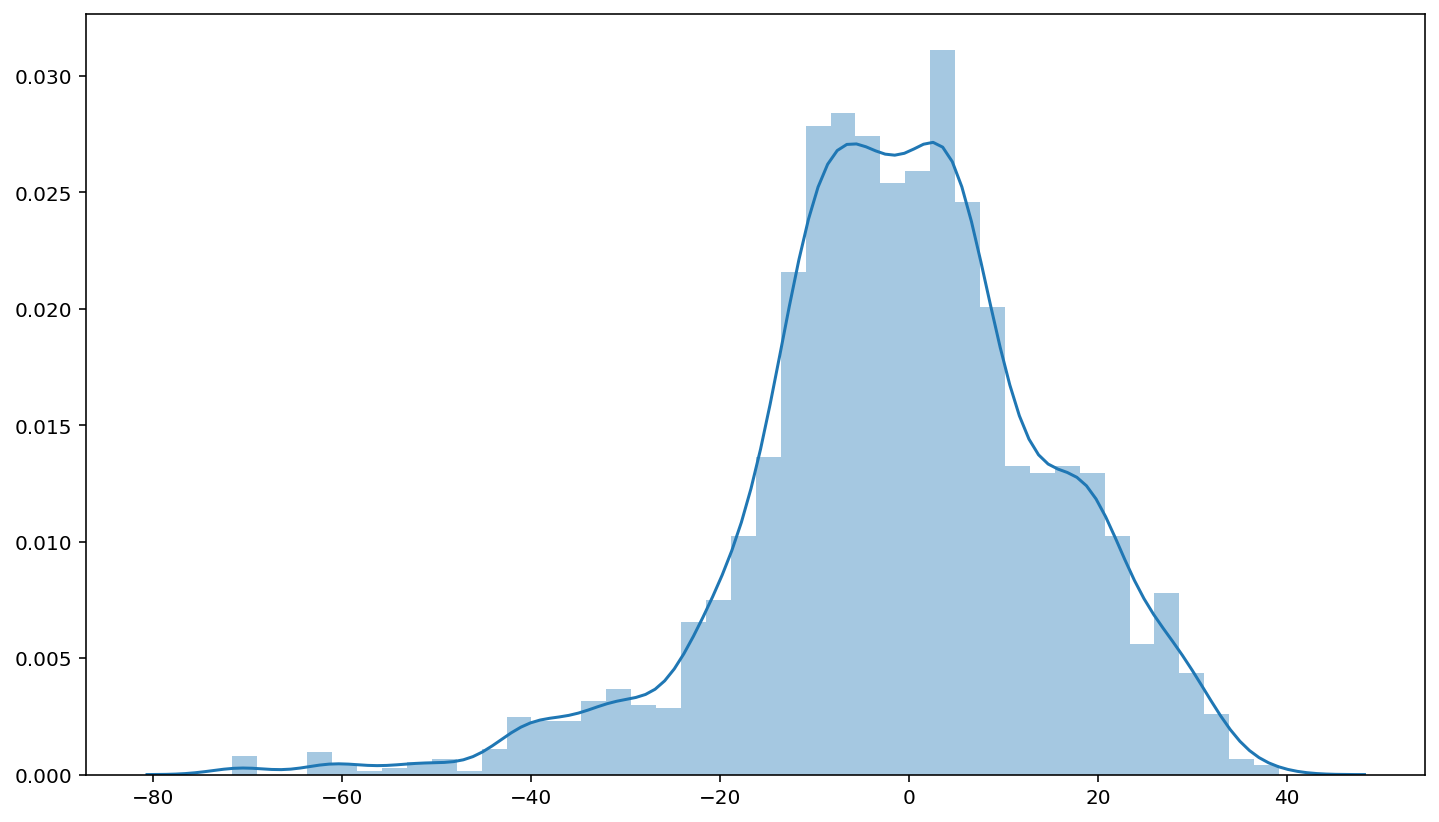

In [27]:
y_pred = ridge_regressor.predict(x_test)
sns.distplot(y_test-y_pred)

In [29]:
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :  12.137088539471241
MSE :  253.61750007597823
RMSE :  15.925372839465274


In [30]:
import pickle
filename= 'first-inning-score-ipl-prediction.pkl'
pickle.dump(ridge_regressor,open(filename, 'wb'))